<a href="https://colab.research.google.com/github/indra07-rm/Data-warehousing-and-Data-mining/blob/main/lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load data
data = pd.read_csv('/content/drive/MyDrive/data mining /data.csv')
X = data[['Feature_1', 'Feature_2']].values

In [4]:
# plot setup

In [7]:
def plot_clusters(X, labels, centers=None, title="Clustering Result", method=""):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', label="Data")

    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label="Centroids/Medoids")

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.figtext(0.99, 0.01, "Indra khadka", ha="right", fontsize=9, color='black')
    plt.grid(True)
    plt.show()

Write a program to implement the k-means algorithm.

---



---




Final K-Means Centroids:
Cluster 1: [1.82512542 2.29187589]
Cluster 2: [5.98432967 5.31352018]


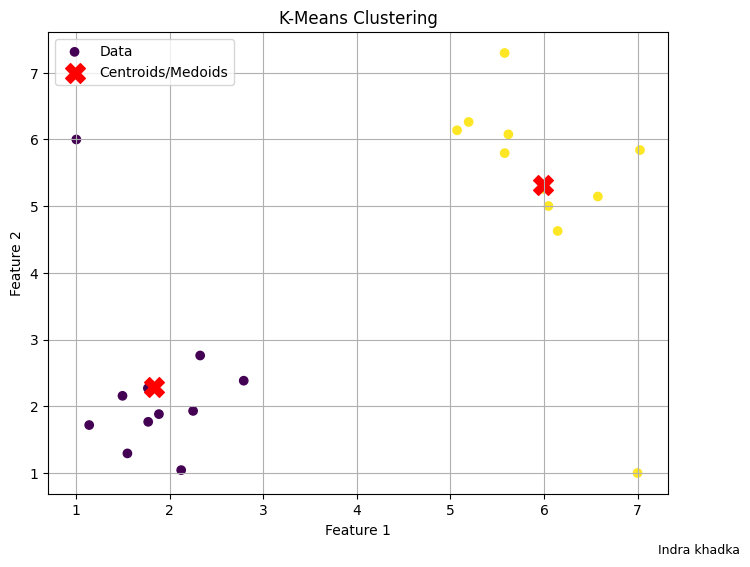

In [8]:
def k_means(X, k, max_iters=100):
    np.random.seed(42)
    random_indices = np.random.choice(len(X), k, replace=False)
    centroids = X[random_indices]

    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return centroids, labels

# Run K-means
k = 2  # Number of clusters
centroids, labels = k_means(X, k)

# Print the centroids
print("Final K-Means Centroids:")
for i, center in enumerate(centroids):
    print(f"Cluster {i + 1}: {center}")

# Plot the results
plot_clusters(X, labels, centers=centroids, title="K-Means Clustering")

##2 k++

K-Means++ Centroids: [[1.82512542 2.29187589]
 [5.98432967 5.31352018]]


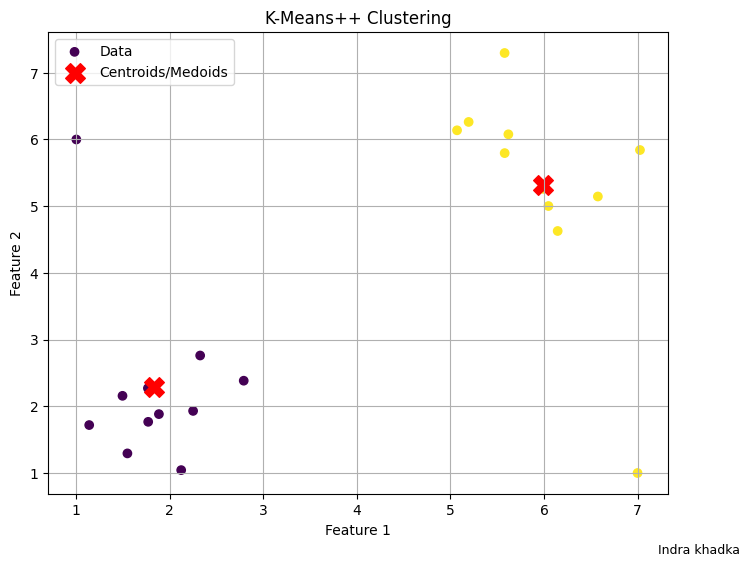

In [10]:
def initialize_kmeans_plus_plus(X, k):
    np.random.seed(42)
    centroids = [X[np.random.randint(X.shape[0])]]
    for _ in range(1, k):
        dist_sq = np.min([np.linalg.norm(X - c, axis=1)**2 for c in centroids], axis=0)
        probs = dist_sq / np.sum(dist_sq)
        cumulative_probs = np.cumsum(probs)
        r = np.random.rand()
        index = np.searchsorted(cumulative_probs, r)
        centroids.append(X[index])
    return np.array(centroids)

def kmeans_plus_plus(X, k, max_iters=100):
    centroids = initialize_kmeans_plus_plus(X, k)
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

k = 2
centroids, labels = kmeans_plus_plus(X, k)
print("K-Means++ Centroids:", centroids)
plot_clusters(X, labels, centers=centroids, title="K-Means++ Clustering")



#3

Final K-Medoids Medoids:
Cluster 1: [1.88292331 1.88293152]
Cluster 2: [5.99055194 5.25960235]


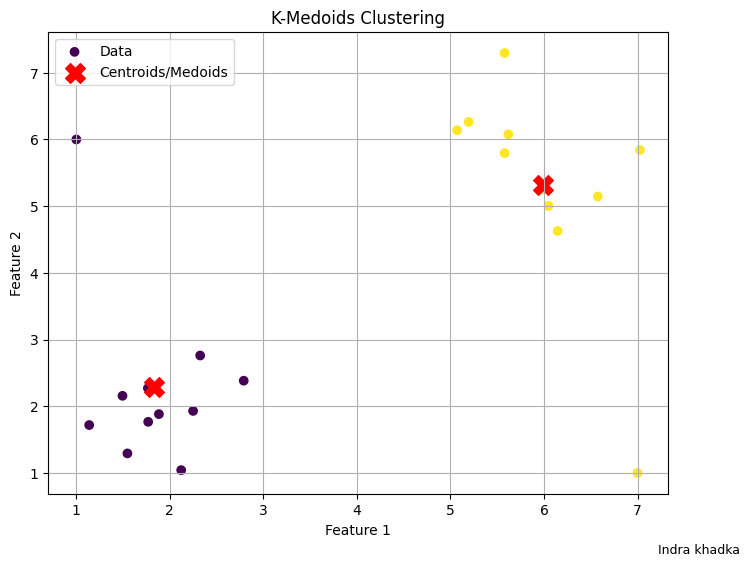

In [12]:

# Function to compute pairwise distances
def pairwise_distances(X):
    m = X.shape[0]
    D = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            D[i, j] = np.linalg.norm(X[i] - X[j])
    return D

# K-Medoids algorithm
def k_medoids(X, k, max_iters=100):
    np.random.seed(42)
    m = X.shape[0]
    distances = pairwise_distances(X)

    # Randomly choose k medoid indices
    medoid_indices = np.random.choice(m, k, replace=False)
    medoids = X[medoid_indices]

    for _ in range(max_iters):
        # Assign points to the nearest medoid
        labels = np.argmin(distances[:, medoid_indices], axis=1)

        new_medoids = []
        for i in range(k):
            cluster_points = np.where(labels == i)[0]
            if len(cluster_points) == 0:
                continue
            # Compute the total distance from each point to all others in the cluster
            cluster_distances = distances[np.ix_(cluster_points, cluster_points)]
            costs = np.sum(cluster_distances, axis=1)
            min_cost_index = cluster_points[np.argmin(costs)]
            new_medoids.append(min_cost_index)

        new_medoids = np.array(new_medoids)

        # If medoids didn't change, we're done
        if np.array_equal(medoid_indices, new_medoids):
            break
        medoid_indices = new_medoids
        medoids = X[medoid_indices]

    return X[medoid_indices], labels

# Run K-Medoids
k = 2
medoids, labels = k_medoids(X, k)

# Print medoids
print("Final K-Medoids Medoids:")
for i, m in enumerate(medoids):
    print(f"Cluster {i+1}: {m}")

plot_clusters(X, labels, centers=centroids, title="K-Medoids Clustering")


# 4

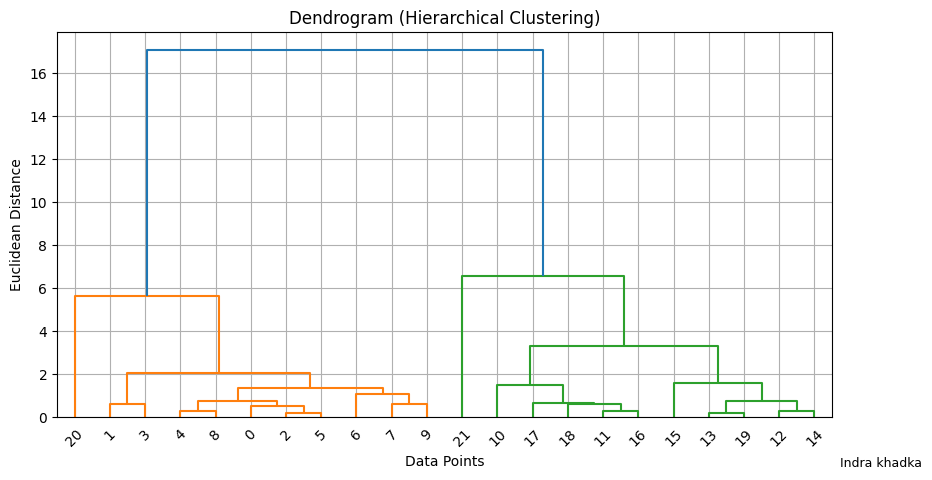

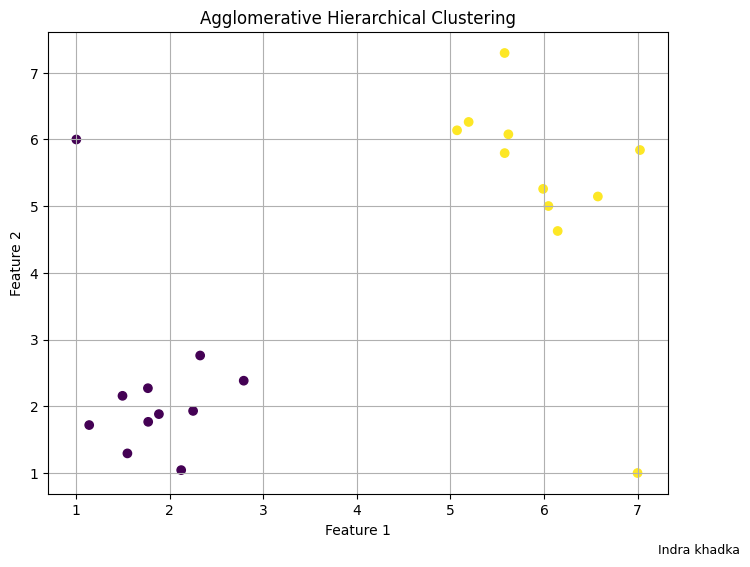

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/data mining /data.csv')
X = data[['Feature_1', 'Feature_2']].values

# Step 1: Compute linkage matrix using Ward's method
Z = linkage(X, method='ward')  # 'ward', 'single', 'complete', 'average'

# Step 2: Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.figtext(0.99, 0.01, "Indra khadka", ha="right", fontsize=9, color='black')
plt.grid(True)
plt.show()

# Step 3: Choose number of clusters and form flat clusters
k = 2  # You can change this to any number of clusters
labels = fcluster(Z, k, criterion='maxclust')

# Step 4: Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("Agglomerative Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.figtext(0.99, 0.01, "Indra khadka", ha="right", fontsize=9, color='black')
plt.grid(True)
plt.show()


# 5

Divisive Clustering Labels:
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1]


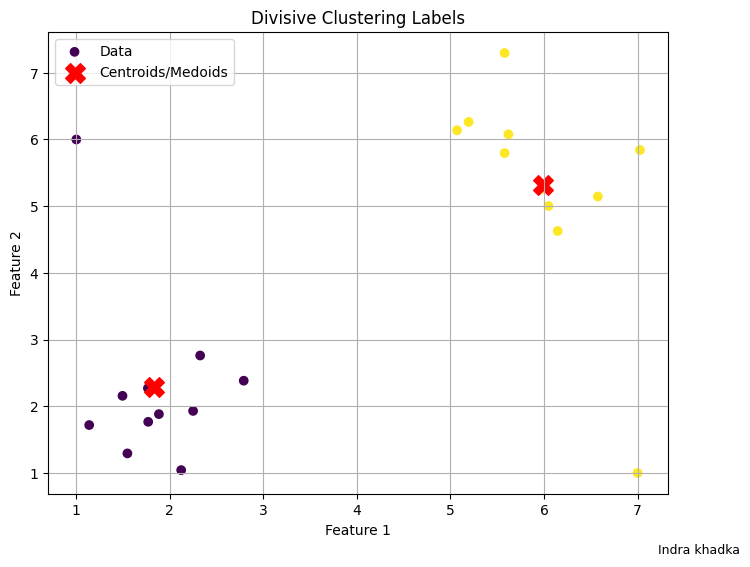

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/data mining /data.csv")
X = data[['Feature_1', 'Feature_2']].values

# Divisive clustering function (top-down using K-Means)
def divisive_clustering(X, k):
    clusters = [X]             # Start with one cluster: all points
    labels = np.zeros(len(X))  # Initial label

    current_label = 0
    while len(clusters) < k:
        # Find the largest cluster to split
        max_cluster_idx = np.argmax([len(c) for c in clusters])
        cluster_to_split = clusters.pop(max_cluster_idx)

        # Perform K-Means with k=2 on the selected cluster
        kmeans = KMeans(n_clusters=2, random_state=42).fit(cluster_to_split)
        sub_labels = kmeans.labels_

        # Split the data and update labels accordingly
        split_1 = cluster_to_split[sub_labels == 0]
        split_2 = cluster_to_split[sub_labels == 1]

        # Map back to original data and update labels
        index = 0
        for i, point in enumerate(X):
            if np.any(np.all(point == cluster_to_split, axis=1)):
                if np.all(point == cluster_to_split[index]):
                    labels[i] = max_cluster_idx
                    index += 1

        # Update clusters
        clusters.insert(max_cluster_idx, split_2)
        clusters.insert(max_cluster_idx, split_1)

    # Final re-labeling
    final_labels = np.zeros(len(X))
    for i, cluster in enumerate(clusters):
        for point in cluster:
            idx = np.where(np.all(X == point, axis=1))[0]
            final_labels[idx] = i

    return final_labels.astype(int)

# Run Divisive Clustering
k = 2  # Number of final clusters
labels = divisive_clustering(X, k)


print("Divisive Clustering Labels:")
print(labels)
# Plot


plot_clusters(X, labels, centers=centroids, title="Divisive Clustering Labels")




# 6

In [17]:
data = pd.read_csv('/content/drive/MyDrive/data mining /data2.csv')
X = data[['Feature_1', 'Feature_2']].values

DBSCAN Cluster Labels:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1 -1]


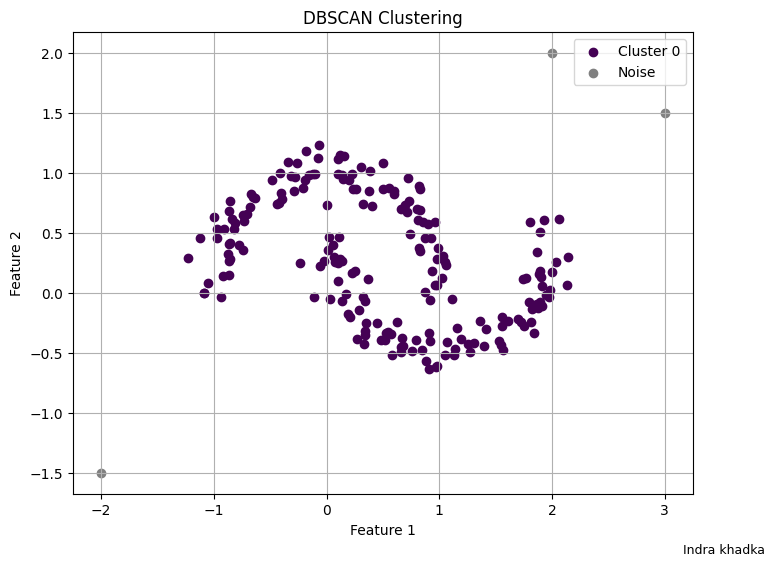

In [19]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
eps = 0.5         # You may tune this value
min_samples = 5   # Minimum points to form a cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

# Print cluster labels (-1 indicates noise)
print("DBSCAN Cluster Labels:")
print(labels)

# Plotting the result
plt.figure(figsize=(8, 6))
# Handle noise (-1) separately for gray color
unique_labels = set(labels)
colors = ['gray' if label == -1 else plt.cm.viridis(i / len(unique_labels))
          for i, label in enumerate(unique_labels)]

for label, color in zip(unique_labels, colors):
    plt.scatter(X[labels == label, 0], X[labels == label, 1],
                c=[color], label=f"Cluster {label}" if label != -1 else "Noise")


plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.figtext(0.99, 0.01, "Indra khadka", ha="right", fontsize=9, color='black')
plt.grid(True)
plt.show()


# 7

Mean: 0.6593333333333333
Standard Deviation: 7.188923393357002

Detected 0 outliers:
[]


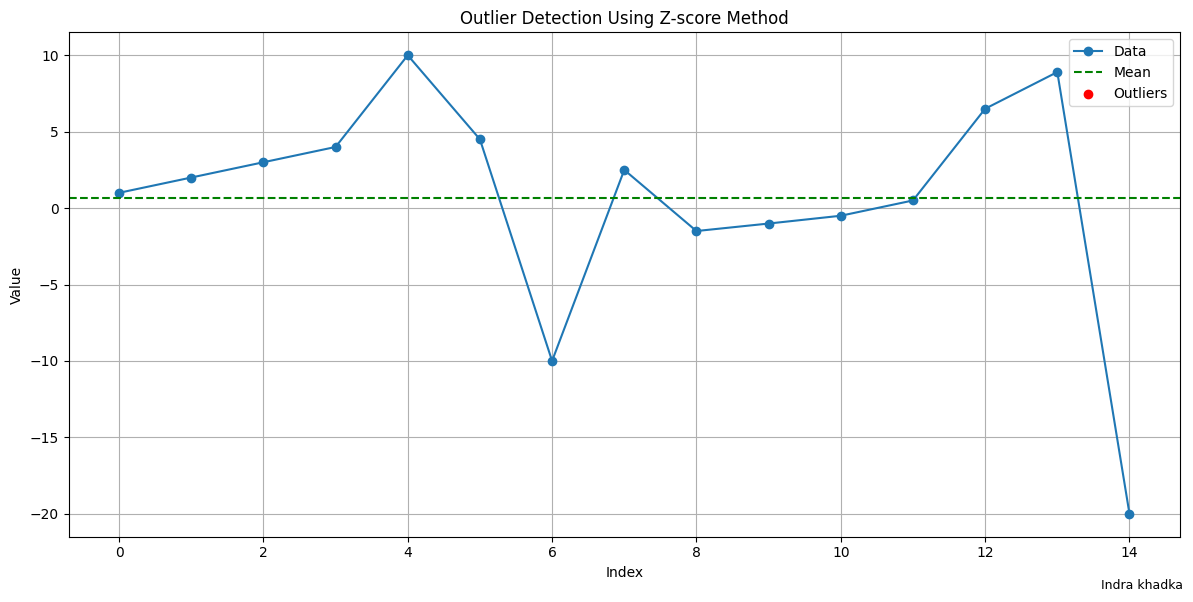

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def detect_outliers_zscore(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = [(x - mean) / std for x in data]
    outliers = [x for x, z in zip(data, z_scores) if abs(z) > threshold]
    return outliers, z_scores, mean, std

# Load the data
df = pd.read_csv("/content/drive/MyDrive/data mining /data3.csv")

# Extract the 'Value' column
values = df['Value']

# Detect outliers
outliers, z_scores, mean, std = detect_outliers_zscore(values)

# Print mean and standard deviation
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

# Print outliers
print(f"\nDetected {len(outliers)} outliers:")
print(outliers)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(values, label='Data', marker='o')
plt.axhline(mean, color='green', linestyle='--', label='Mean')

# Highlight outliers
plt.scatter(
    [i for i, z in enumerate(z_scores) if abs(z) > 3],
    [x for x, z in zip(values, z_scores) if abs(z) > 3],
    color='red', label='Outliers', zorder=5
)

# Title and signature
plt.title('Outlier Detection Using Z-score Method')
plt.figtext(0.99, 0.01, "Indra khadka", ha="right", fontsize=9, color='black')

# Labels and style
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 8

Q1 (25th percentile): -0.755
Q3 (75th percentile): 4.25
IQR: 5.005
Lower bound: -8.262500000000001
Upper bound: 11.7575

Detected 2 outliers:
[-10. -20.]


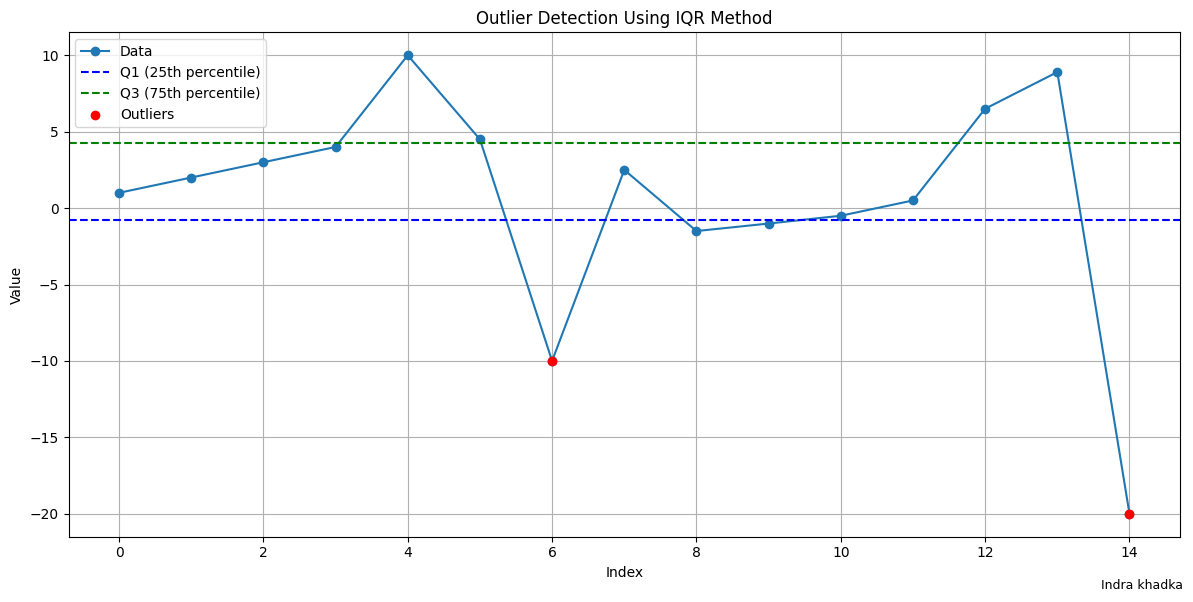

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, Q1, Q3, IQR, lower_bound, upper_bound

# Load the data
df = pd.read_csv("/content/drive/MyDrive/data mining /data3.csv")

# Extract the 'Value' column
values = df['Value']

# Detect outliers using IQR
outliers, Q1, Q3, IQR, lower_bound, upper_bound = detect_outliers_iqr(values)

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"\nDetected {len(outliers)} outliers:")
print(outliers.values)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(values, label='Data', marker='o')
plt.axhline(Q1, color='blue', linestyle='--', label='Q1 (25th percentile)')
plt.axhline(Q3, color='green', linestyle='--', label='Q3 (75th percentile)')
plt.scatter(outliers.index, outliers.values, color='red', label='Outliers', zorder=5)

# Title and signature
plt.title('Outlier Detection Using IQR Method')
plt.figtext(0.99, 0.01, "Indra khadka", ha="right", fontsize=9, color='black')

plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 9

Final Centroids:
[[-6.87404905 -6.0138462 ]
 [ 1.5673594   5.25128314]
 [-6.26072315 -7.55391631]]


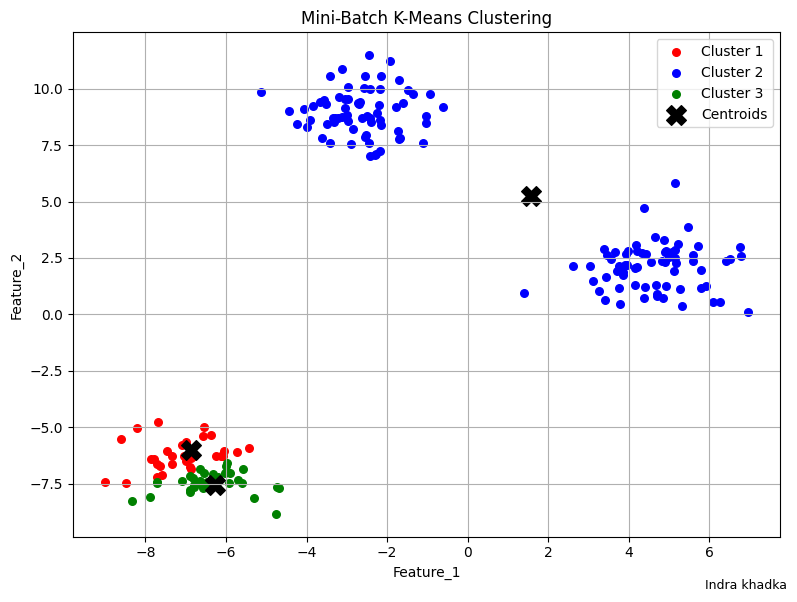

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def initialize_centroids(data, k):
    indices = np.random.choice(len(data), k, replace=False)
    return data[indices]

def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(centroids, data_batch, cluster_batch, k, learning_rate=0.1):
    for i in range(len(data_batch)):
        cluster = cluster_batch[i]
        centroids[cluster] = (1 - learning_rate) * centroids[cluster] + learning_rate * data_batch[i]
    return centroids

def mini_batch_kmeans(data, k=3, batch_size=20, max_iters=100):
    data = np.array(data)
    centroids = initialize_centroids(data, k)

    for iteration in range(max_iters):
        batch_indices = np.random.choice(len(data), batch_size, replace=False)
        data_batch = data[batch_indices]
        cluster_batch = assign_clusters(data_batch, centroids)
        centroids = update_centroids(centroids, data_batch, cluster_batch, k)

    # Final cluster assignment (optional)
    final_clusters = assign_clusters(data, centroids)
    return centroids, final_clusters

# Load data4.csv
df = pd.read_csv('/content/drive/MyDrive/data mining /data4.csv')
data = df[['Feature_1', 'Feature_2']].values

# Run Mini-Batch K-Means
k = 3  # You can change this
centroids, cluster_assignments = mini_batch_kmeans(data, k=k, batch_size=20, max_iters=100)

# Print final centroids
print("Final Centroids:")
print(centroids)

# Plot the clustered data
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(k):
    points = data[cluster_assignments == i]
    plt.scatter(points[:, 0], points[:, 1], s=30, label=f'Cluster {i+1}', color=colors[i % len(colors)])

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('Mini-Batch K-Means Clustering')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.legend()
plt.figtext(0.99, 0.01, "Indra khadka", ha="right", fontsize=9, color='black')
plt.grid(True)
plt.tight_layout()
plt.show()
